In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from src.features.cleaning import clean_data
from src.utils import get_project_root

/tmp/ipykernel_29361/1153839870.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
dir_root = get_project_root()
dir_data = 'data'
filename_data_brain = os.path.join(
    dir_root,
    dir_data,
    'survival_brain_2000_to_2020_seer_2022_db.csv'
)
data_raw = pd.read_csv(filename_data_brain)

/tmp/ipykernel_29361/838592508.py:8: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv(filename_data_brain)


In [4]:
data = clean_data(data_raw)

In [5]:
print(data.columns)

Index(['Age recode with <1 year olds', 'Sex', 'Year of diagnosis',
       'PRCDA 2020', 'Race recode (W, B, AI, API)',
       'Origin recode NHIA (Hispanic, Non-Hisp)',
       'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)',
       'TNM 7/CS v0204+ Schema (thru 2017)', 'AYA site recode 2020 Revision',
       'ICCC site recode 3rd edition/IARC 2017',
       ...
       'Race recode (White, Black, Other, Unknown) - no total',
       'Year of diagnosis (2000-2019 by 5)',
       'End Calc Vital Status (Adjusted)', 'Number of Intervals (Calculated)',
       'Age Standard for Survival (15-44,45-54,55-64,65-74,75+).1',
       'Alive at last contact',
       'Median household income inflation adj to 2021 (thousands USD)',
       'Combined Tumor Size', 'No tumor found', 'Unknown tumor size'],
      dtype='object', length=129)


For an initial look, let's just define a list of some of the  columns that look interesting.

In [6]:
data.head(10)

Age recode with <1 year olds     Sex  Year of diagnosis PRCDA 2020  \
0                             15  Female               2000  Not PRCDA   
2                             15    Male               2000  Not PRCDA   
3                             15    Male               2000  Not PRCDA   
4                             15    Male               2004  Not PRCDA   
5                             15  Female               2001  Not PRCDA   
6                             15    Male               2002  Not PRCDA   
7                             15    Male               2000  Not PRCDA   
8                             15    Male               2001  Not PRCDA   
9                             15    Male               2003  Not PRCDA   
10                            15    Male               2001  Not PRCDA   

   Race recode (W, B, AI, API) Origin recode NHIA (Hispanic, Non-Hisp)  \
0                        White             Non-Spanish-Hispanic-Latino   
2                        White                 Spanish-Hispanic-Latino   
3    Asian or Pacific Islander             Non-Spanish-Hispanic-Latino   
4                        White             Non-Spanish-Hispanic-Latino   
5                        White                 Spanish-Hispanic-Latino   
6                        Black             Non-Spanish-Hispanic-Latino   
7                        White             Non-Spanish-Hispanic-Latino   
8                        White                 Spanish-Hispanic-Latino   
9                        White             Non-Spanish-Hispanic-Latino   
10                       White             Non-Spanish-Hispanic-Latino   

   Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)  \
0                                  Non-Hispanic White           
2                                Hispanic (All Races)           
3              Non-Hispanic Asian or Pacific Islander           
4                                  Non-Hispanic White           
5                                Hispanic (All Races)           
6                                  Non-Hispanic Black           
7                                  Non-Hispanic White           
8                                Hispanic (All Races)           
9                                  Non-Hispanic White           
10                                 Non-Hispanic White           

   TNM 7/CS v0204+ Schema (thru 2017)  \
0                               Brain   
2                               Brain   
3                               Brain   
4                               Brain   
5                               Brain   
6                               Brain   
7                               Brain   
8                               Brain   
9                               Brain   
10                              Brain   

                      AYA site recode 2020 Revision  \
0                   3.1.2.2 Glioblastoma - invasive   
2                   3.1.2.2 Glioblastoma - invasive   
3             7.3 Germ cell and trophoblastic - CNS   
4                   3.1.2.2 Glioblastoma - invasive   
5              3.1.1.2 Oligodendroglioma - invasive   
6                     3.1.4.1 Pilocytic astrocytoma   
7              3.1.1.2 Oligodendroglioma - invasive   
8             7.3 Germ cell and trophoblastic - CNS   
9                   3.1.2.2 Glioblastoma - invasive   
10  3.1.4.3 Other astrocytoma/astroglial - invasive   

              ICCC site recode 3rd edition/IARC 2017  ...  \
0                                  IIIb Astrocytomas  ...   
2                                  IIIb Astrocytomas  ...   
3   Xa Intracranial and intraspinal germ cell tumors  ...   
4                                  IIIb Astrocytomas  ...   
5                                 IIId Other gliomas  ...   
6                                  IIIb Astrocytomas  ...   
7                                 IIId Other gliomas  ...   
8   Xa Intracranial and intraspinal germ cell tumors  ...   
9                                  IIIb Astrocytoma

In [7]:
categorical_columns = [
    'Sex',
    'Race recode (W, B, AI, API)', 
    'Origin recode NHIA (Hispanic, Non-Hisp)', 
    'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)', 
    'Vital status recode (study cutoff used)', 
    'SEER cause-specific death classification', 
    'SEER other cause of death classification', 
    'Type of Reporting Source', 
    'Marital status at diagnosis', 
    'Rural-Urban Continuum Code', 
    'End Calc Vital Status (Adjusted)', 
]
numerical_columns = [
    'Year of diagnosis', 
    'Year of follow-up recode', 
    'Year of diagnosis (2000-2019 by 5)', 
    'Survival months'
]
other_useful_columns = [
    'Alive at last contact', 
    'Year of death recode', 
    'Age recode with <1 year olds', 
    'Median household income inflation adj to 2021 (thousands USD)'
]
all_useful_columns = categorical_columns + numerical_columns + other_useful_columns
data = data.astype({col: 'category' for col in categorical_columns})

In [8]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(
    data, 
    test_size=0.2, 
    random_state=2984, 
    shuffle=True, 
    stratify=data['Vital status recode (study cutoff used)']
)

# Make a smaller dataframe for testing
d = data_train[all_useful_columns]

In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59465 entries, 36458 to 5202
Data columns (total 19 columns):
 #   Column                                                         Non-Null Count  Dtype   
---  ------                                                         --------------  -----   
 0   Sex                                                            59465 non-null  category
 1   Race recode (W, B, AI, API)                                    59465 non-null  category
 2   Origin recode NHIA (Hispanic, Non-Hisp)                        59465 non-null  category
 3   Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)     59465 non-null  category
 4   Vital status recode (study cutoff used)                        59465 non-null  category
 5   SEER cause-specific death classification                       59465 non-null  category
 6   SEER other cause of death classification                       59465 non-null  category
 7   Type of Reporting Source                           

## Exploratory Data Analysis

In [10]:
d.head(10)

Sex    Race recode (W, B, AI, API)  \
36458    Male                          White   
23743  Female                          Black   
53000    Male  American Indian/Alaska Native   
42072    Male                          White   
46863    Male                          White   
36148  Female                          White   
68191    Male                          White   
68449    Male                          White   
24819  Female                          White   
38975  Female                          White   

      Origin recode NHIA (Hispanic, Non-Hisp)  \
36458             Non-Spanish-Hispanic-Latino   
23743             Non-Spanish-Hispanic-Latino   
53000             Non-Spanish-Hispanic-Latino   
42072             Non-Spanish-Hispanic-Latino   
46863             Non-Spanish-Hispanic-Latino   
36148             Non-Spanish-Hispanic-Latino   
68191             Non-Spanish-Hispanic-Latino   
68449             Non-Spanish-Hispanic-Latino   
24819             Non-Spanish-Hispanic-Latino   
38975             Non-Spanish-Hispanic-Latino   

      Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)  \
36458                                 Non-Hispanic White           
23743                                 Non-Hispanic Black           
53000         Non-Hispanic American Indian/Alaska Native           
42072                                 Non-Hispanic White           
46863                                 Non-Hispanic White           
36148                                 Non-Hispanic White           
68191                                 Non-Hispanic White           
68449                                 Non-Hispanic White           
24819                                 Non-Hispanic White           
38975                                 Non-Hispanic White           

      Vital status recode (study cutoff used)  \
36458                                    Dead   
23743                                    Dead   
53000                                    Dead   
42072                                    Dead   
46863                                    Dead   
36148                                   Alive   
68191                                    Dead   
68449                                    Dead   
24819                                   Alive   
38975                                    Dead   

      SEER cause-specific death classification  \
36458    Dead (attributable to this cancer dx)   
23743    Dead (attributable to this cancer dx)   
53000    Dead (attributable to this cancer dx)   
42072    Dead (attributable to this cancer dx)   
46863    Dead (attributable to this cancer dx)   
36148             Alive or dead of other cause   
68191    Dead (attributable to this cancer dx)   
68449    Dead (attributable to this cancer dx)   
24819             Alive or dead of other cause   
38975    Dead (attributable to this cancer dx)   

      SEER other cause of death classification  \
36458              Alive or dead due to cancer   
23743              Alive or dead due to cancer   
53000              Alive or dead due to cancer   
42072              Alive or dead due to cancer   
46863              Alive or dead due to cancer   
36148              Alive or dead due to cancer   
68191              Alive or dead due to cancer   
68449              Alive or dead due to cancer   
24819              Alive or dead due to cancer   
38975              Alive or dead due to cancer   

                      Type of Reporting Source  \
36458  Hospital inpatient/outpatient or clinic   
23743  Hospital inpatient/outpatient or clinic   
53000  Hospital inpatient/outpatient or clinic   
42072  Hospital inpatient/outpatient or clinic   
46863  Hospital inpatient/outpatient or clinic   
36148  Hospital inpatient/outpatient or clinic   
68191  Hospital inpatient/outpatient or clinic   
68449  Hospital inpatient/outpatient or clinic   
24819  Hospital inpatient/outpatient or clinic   
38975  Hospital inpatient/outpatient or clinic   


### Data Visualization

We want to get a rough idea of the distributions within the data. This initial look should be fairly cursory, since we haven't even done the train-test split yet.

Below are several quick summary plots of some of the most important features. (There are a few formatting issues.)

In [11]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels)

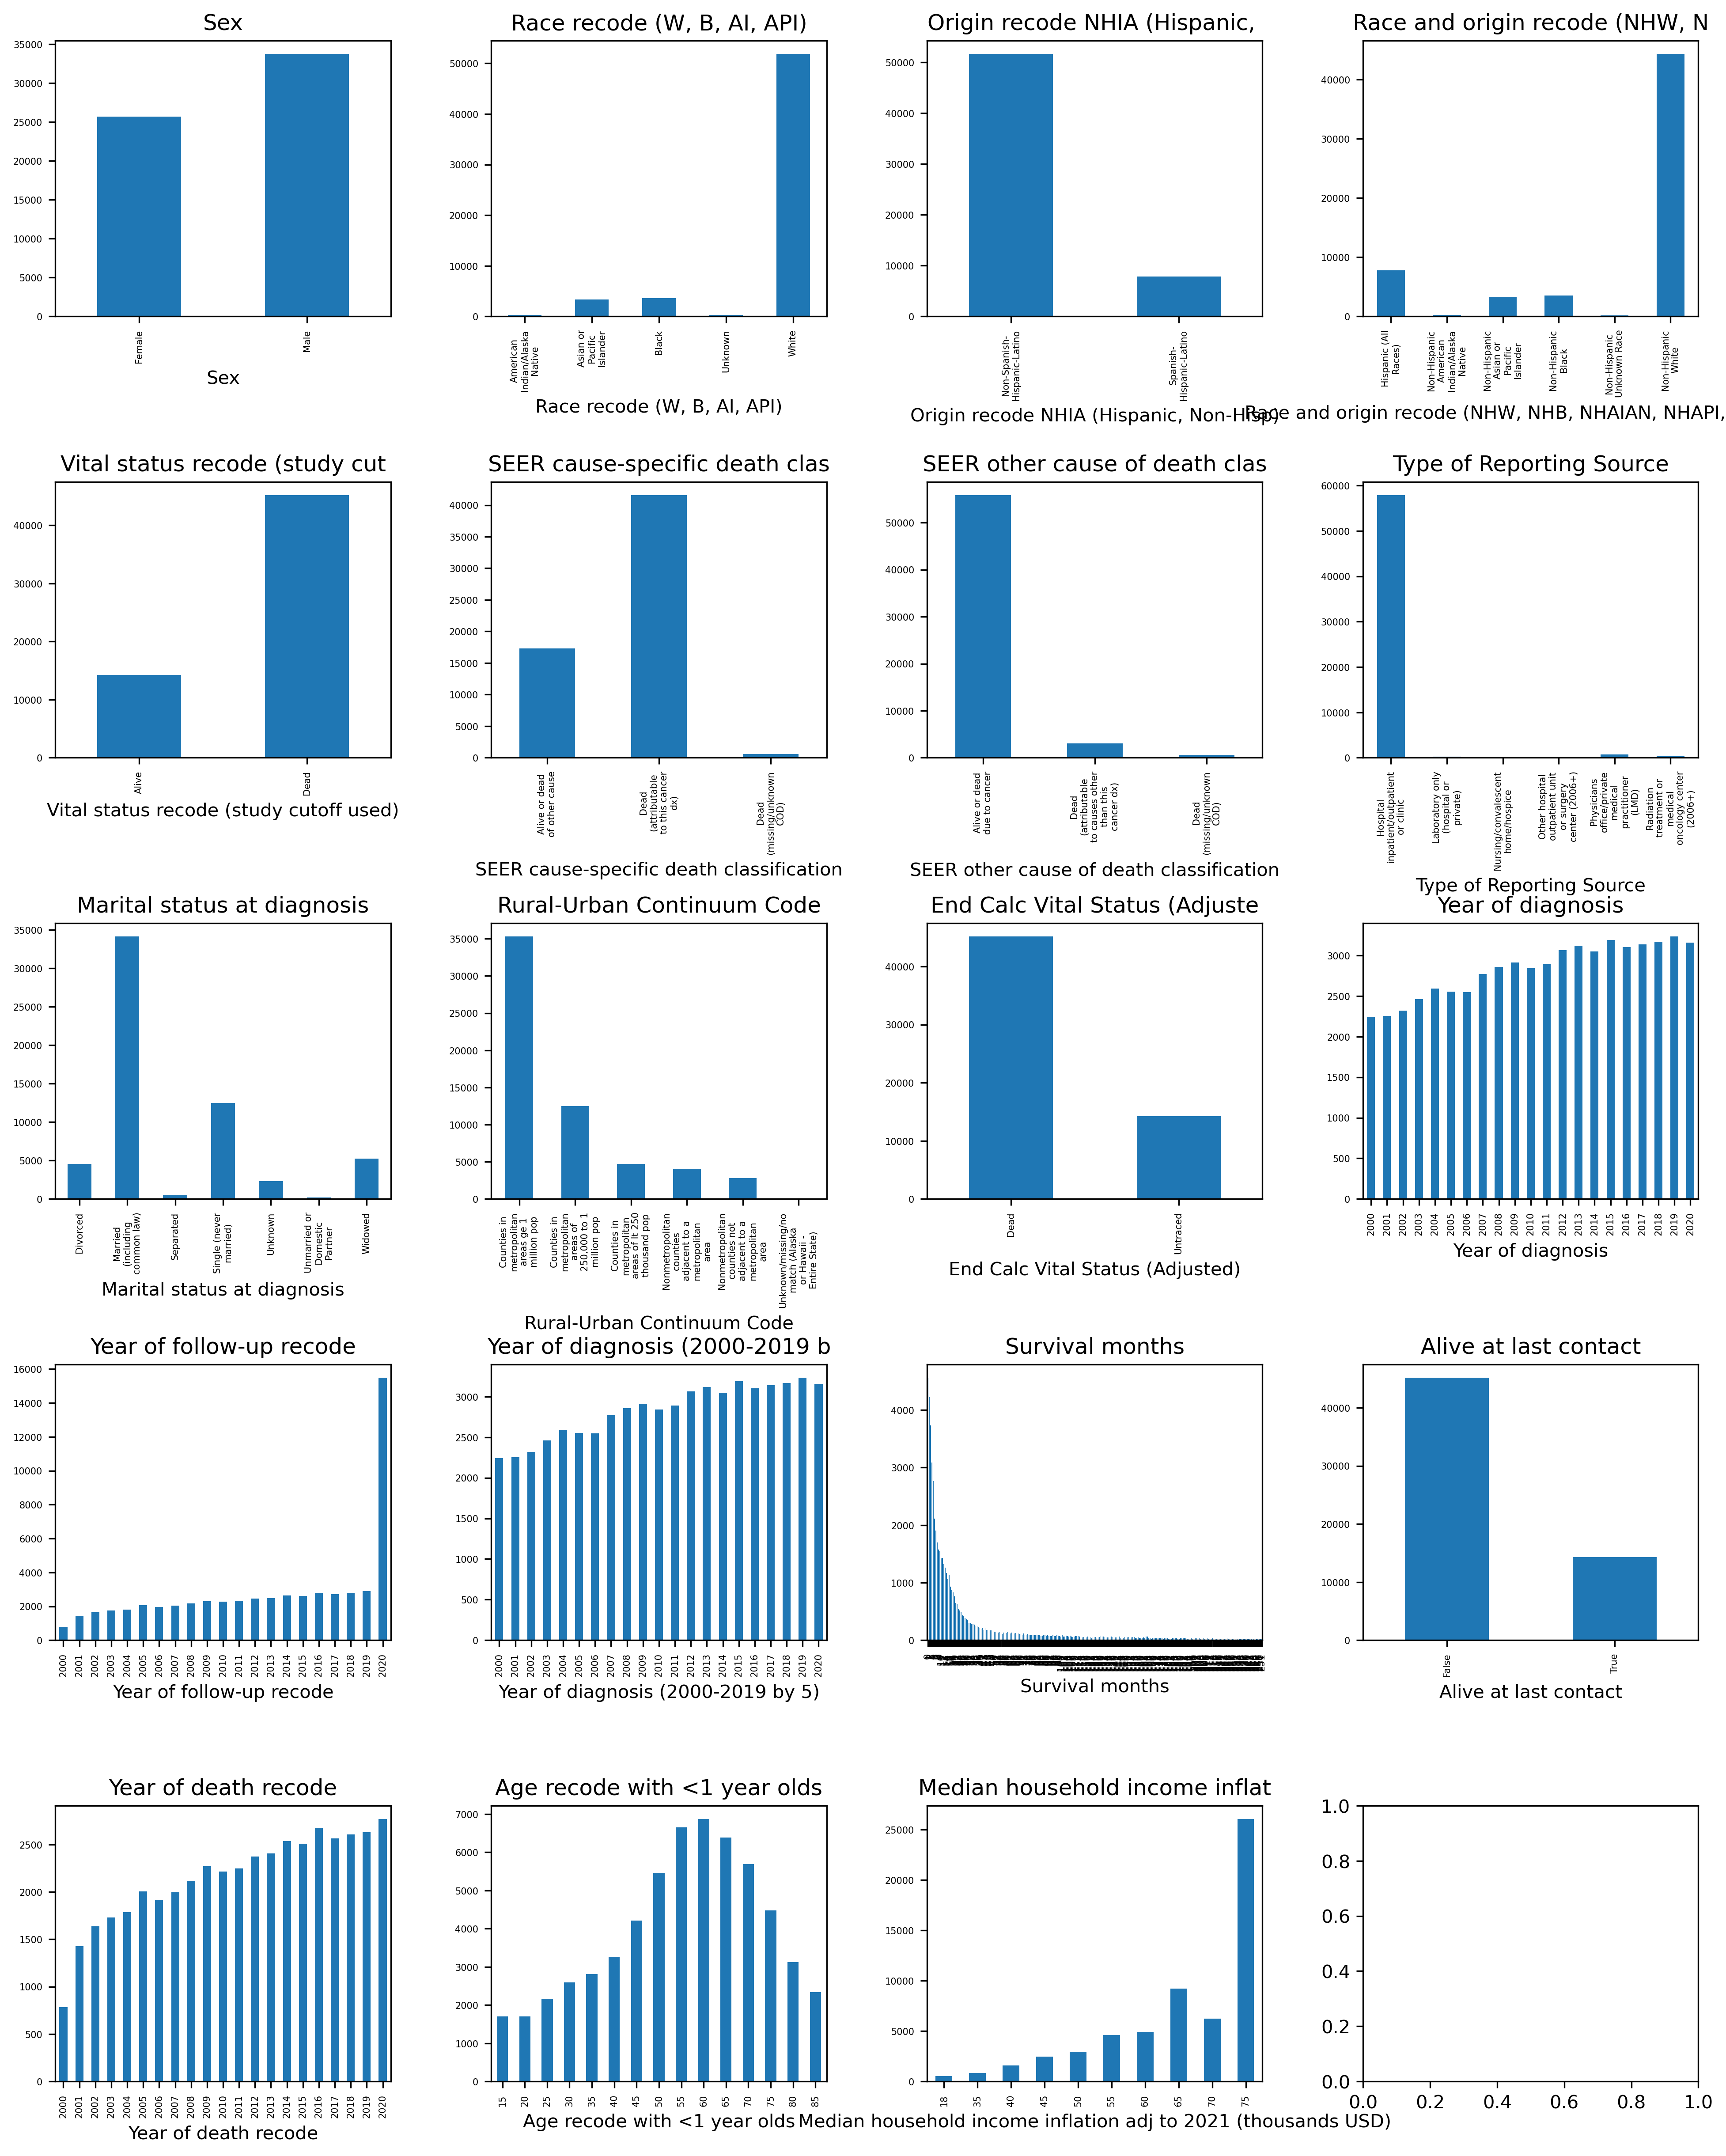

In [12]:
fig, axes = plt.subplots(5, 4, figsize=(16,20), dpi=300)
for col, ax in zip(d, axes.ravel()):
    d[col].value_counts().sort_index().plot.bar(ax=ax, title=col[:30])
    wrap_labels(ax, 15)
    ax.tick_params(axis='both', which='major', labelsize=5)
fig.subplots_adjust(wspace=0.3, hspace=0.6)

In [13]:
import seaborn as sns
sns.set_theme(rc={"figure.dpi": 100})

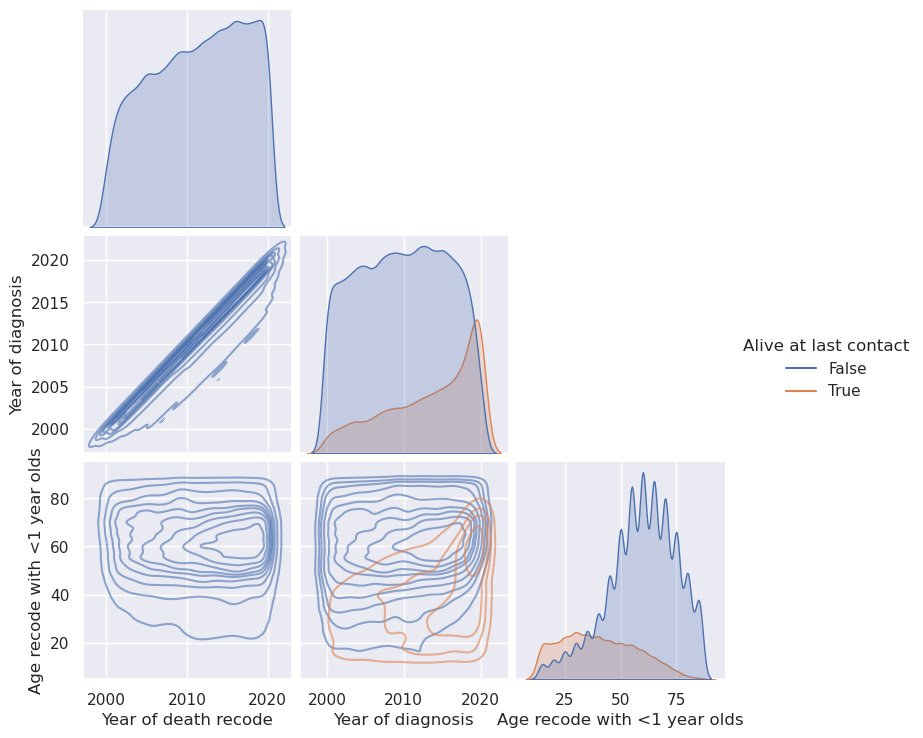

In [14]:
c = [
    'Year of death recode', 
    'Year of diagnosis', 
    'Age recode with <1 year olds', 
    # 'Sex', 
    # 'Race recode (W, B, AI, API)', 
    # 'Total number of in situ/malignant tumors for patient', 
    # # 'Alive at last contact', 
    # 'Median household income inflation adj to 2021 (thousands USD)'
]
sns.pairplot(
    data=d,
    x_vars=c,
    y_vars=c,
    hue='Alive at last contact',
    plot_kws={'alpha': 0.6},
    kind='kde',
    corner=True
)

(Note that the KDE in the distribution plot is smoothing over the age ranges.)

array([[<Axes: title={'center': 'Age recode with <1 year olds'}>]],
      dtype=object)

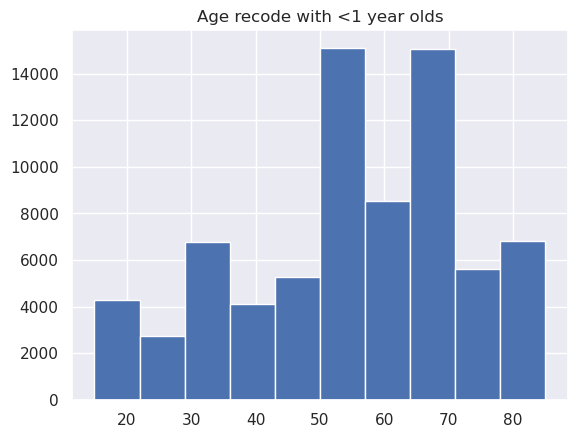

In [15]:
data.hist(['Age recode with <1 year olds'])

<Axes: xlabel='Age recode with <1 year olds', ylabel='Survival months'>

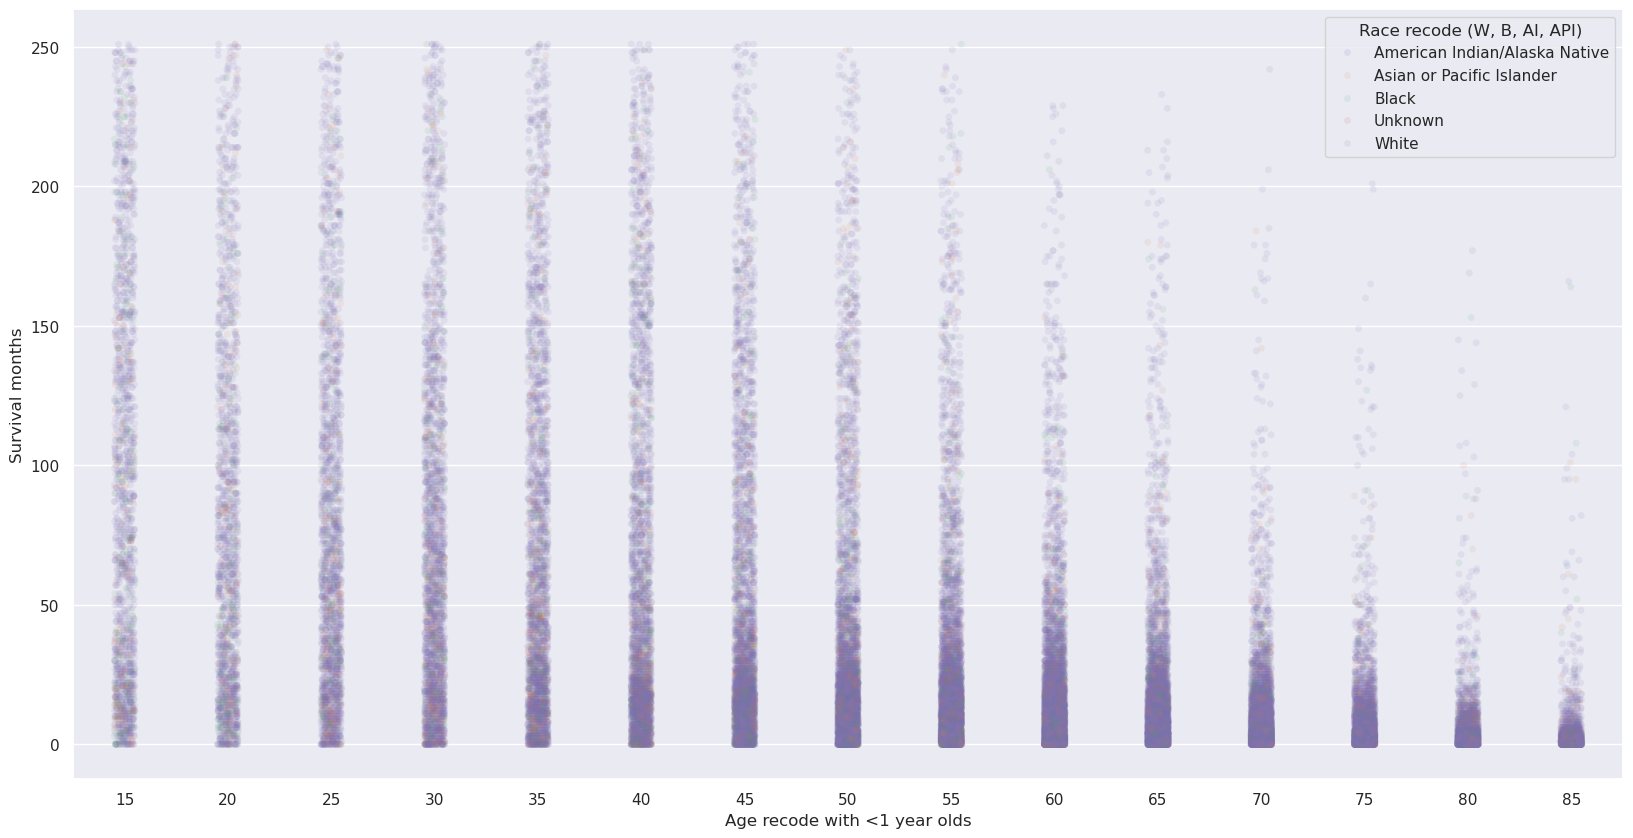

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.stripplot(
    ax=ax,
    data=d,
    x='Age recode with <1 year olds',
    y='Survival months',
    hue='Race recode (W, B, AI, API)',
    alpha=0.1
)

Since we can't see a whole lot here, let's make a plot for each age range.

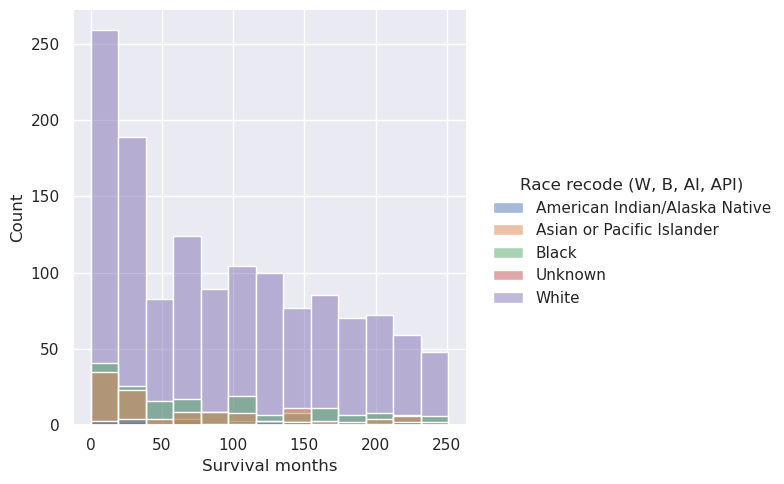

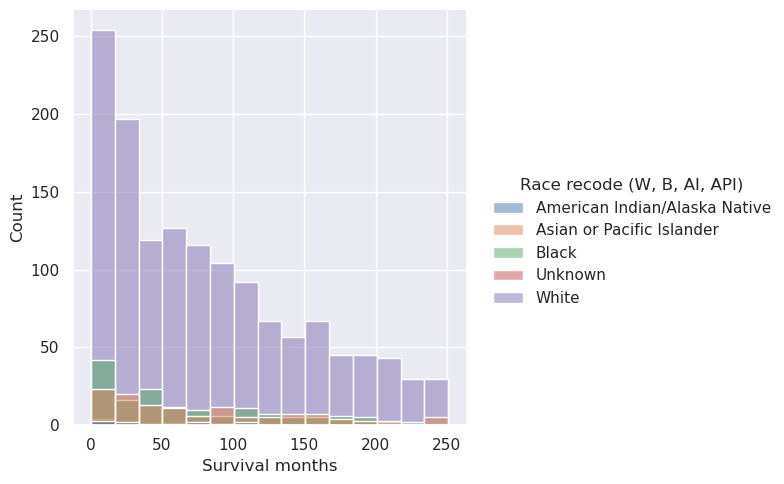

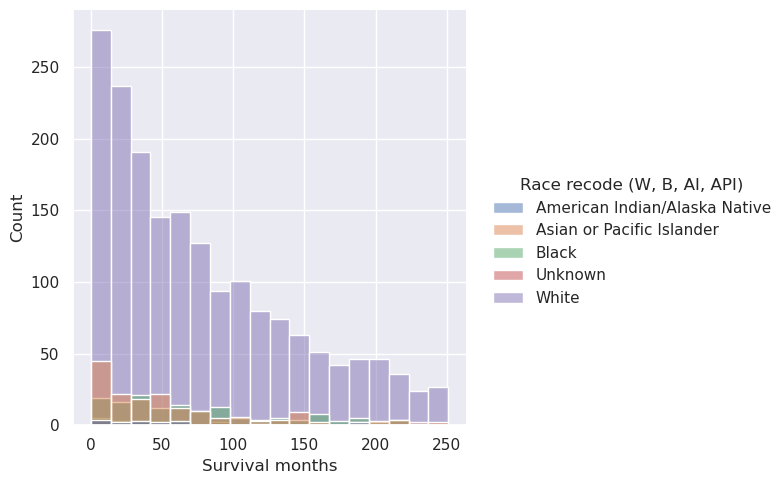

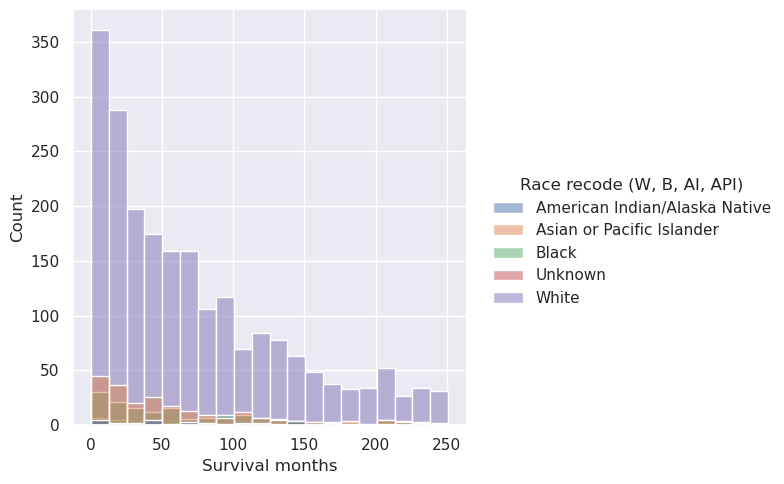

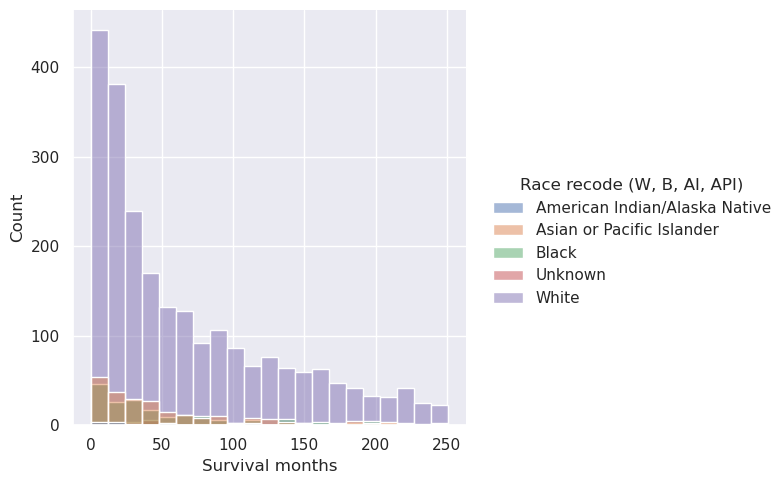

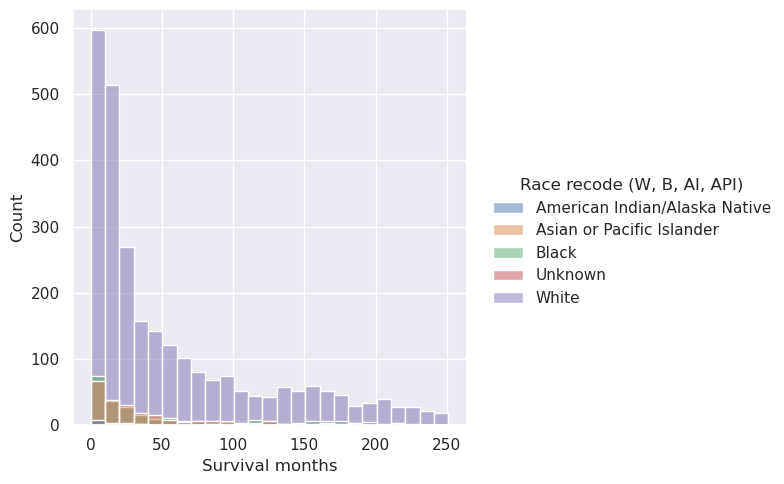

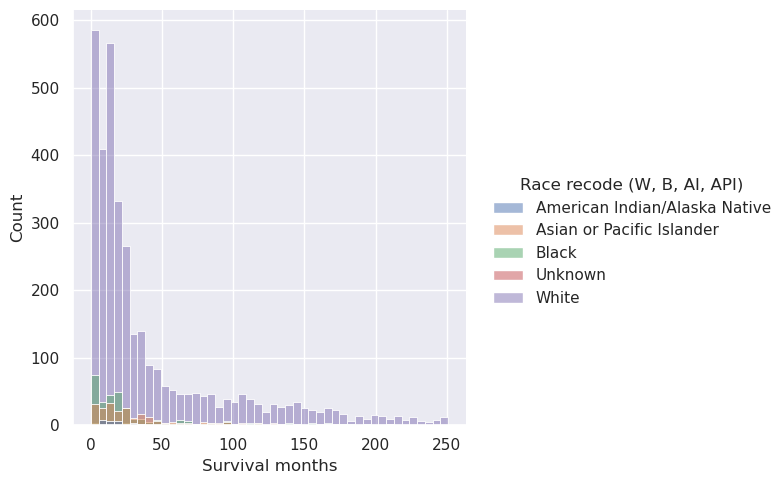

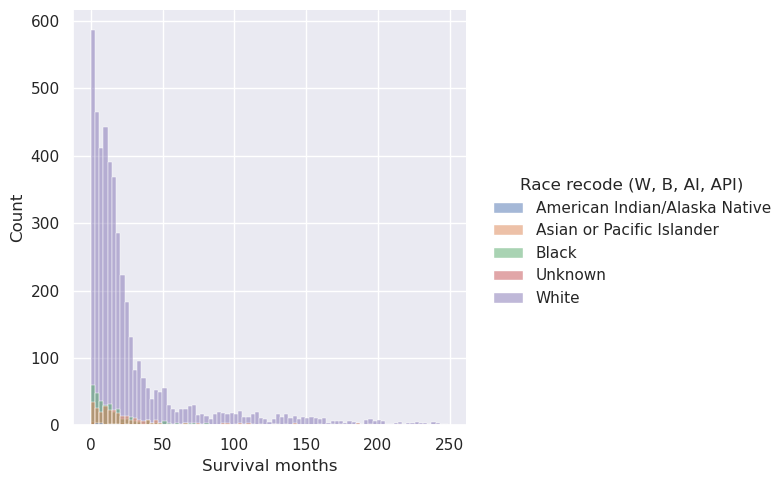

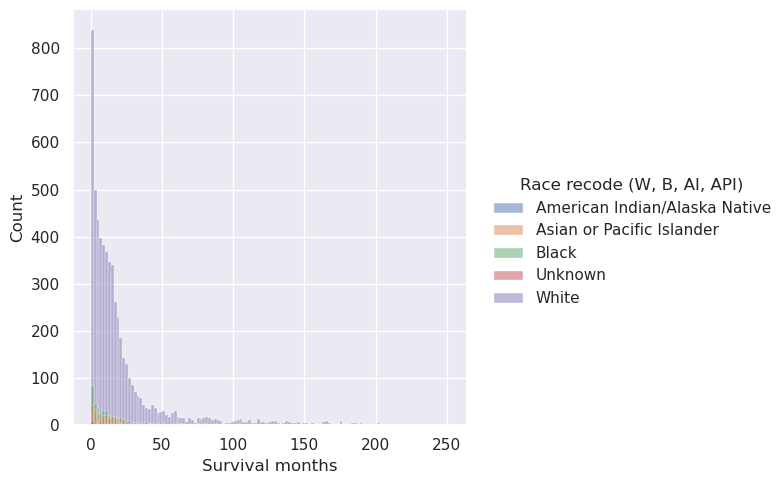

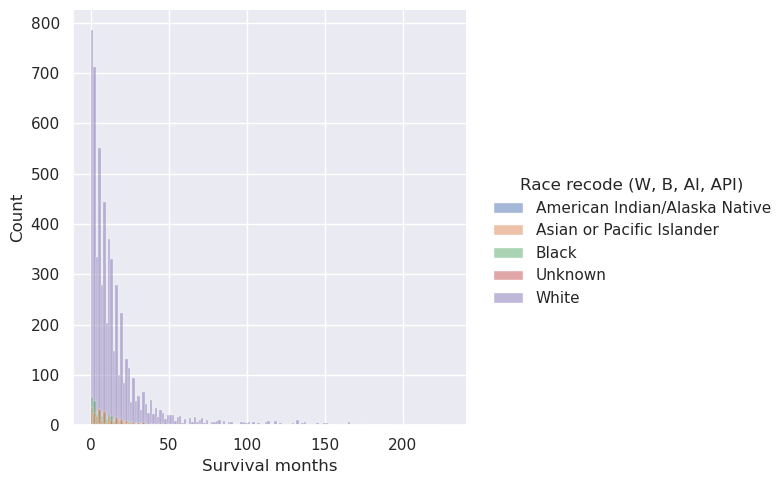

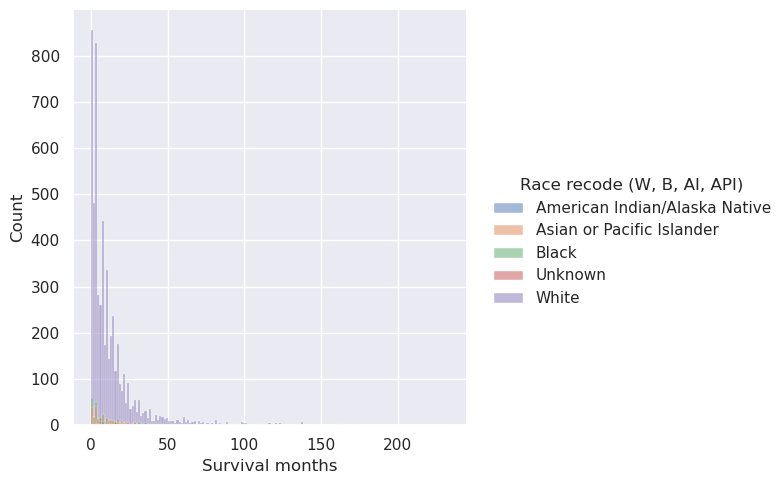

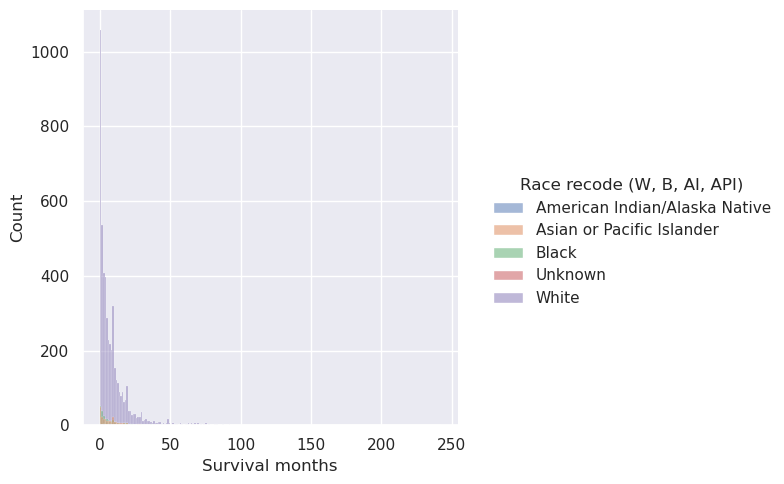

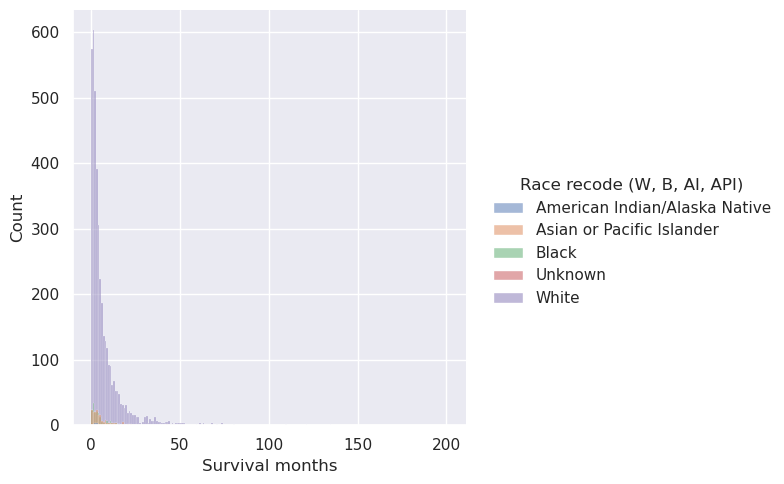

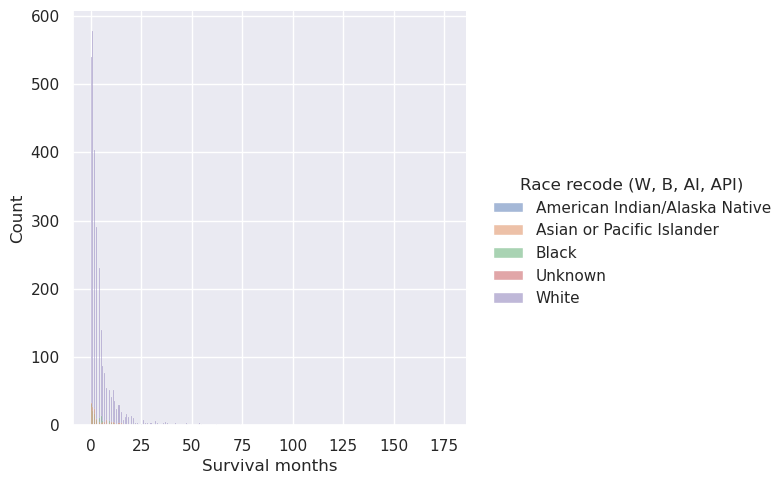

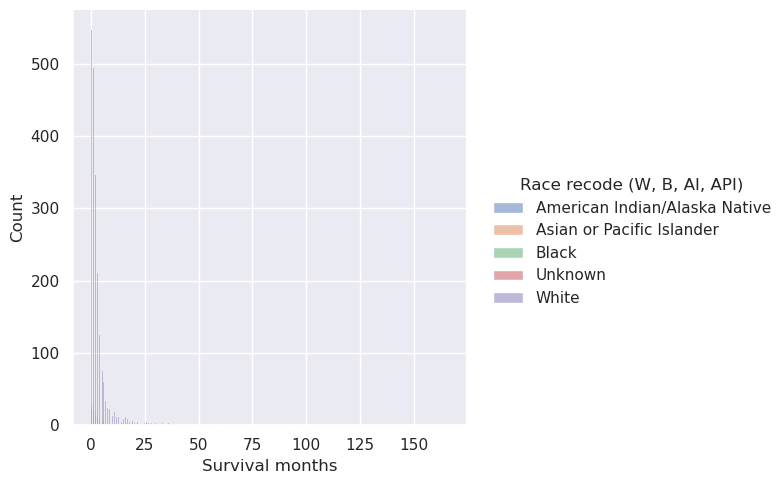

In [17]:
for age in sorted(d['Age recode with <1 year olds'].unique()):
    dd = d[d['Age recode with <1 year olds'] == age]
    sns.displot(data=dd, x='Survival months', hue='Race recode (W, B, AI, API)', kind='hist')

<Axes: xlabel='Year of diagnosis', ylabel='Survival months'>

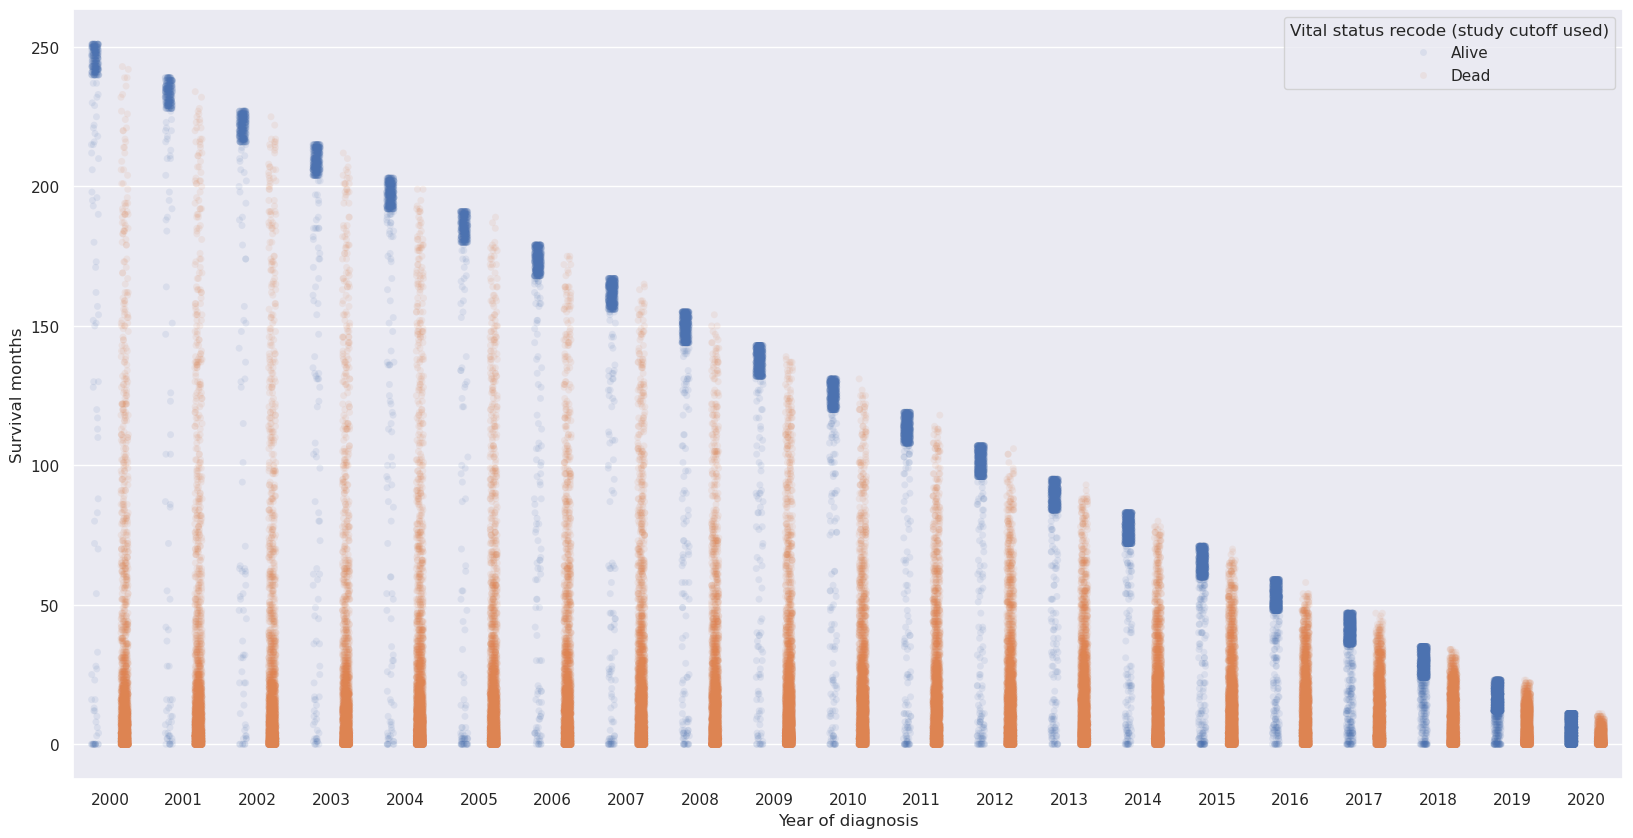

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
sns.stripplot(
    ax=ax,
    data=data,
    x='Year of diagnosis',
    y='Survival months',
    hue='Vital status recode (study cutoff used)',
    dodge=True,
    alpha=0.1
)

<Axes: xlabel='Vital status recode (study cutoff used)', ylabel='count'>

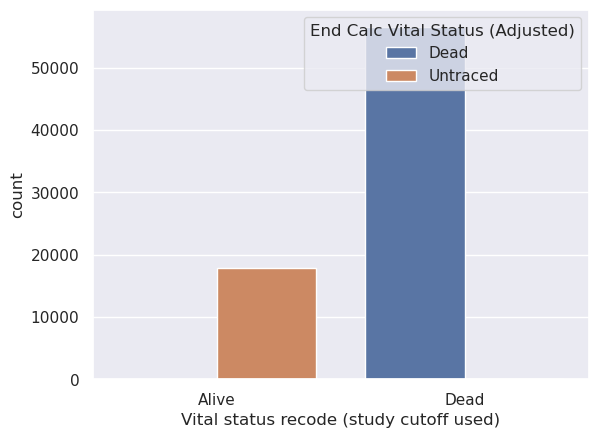

In [19]:
fig, ax = plt.subplots()
sns.countplot(
    ax=ax,
    data=data,
    x='Vital status recode (study cutoff used)',
    hue='End Calc Vital Status (Adjusted)'
)

<Axes: xlabel='Year of diagnosis', ylabel='Survival months'>

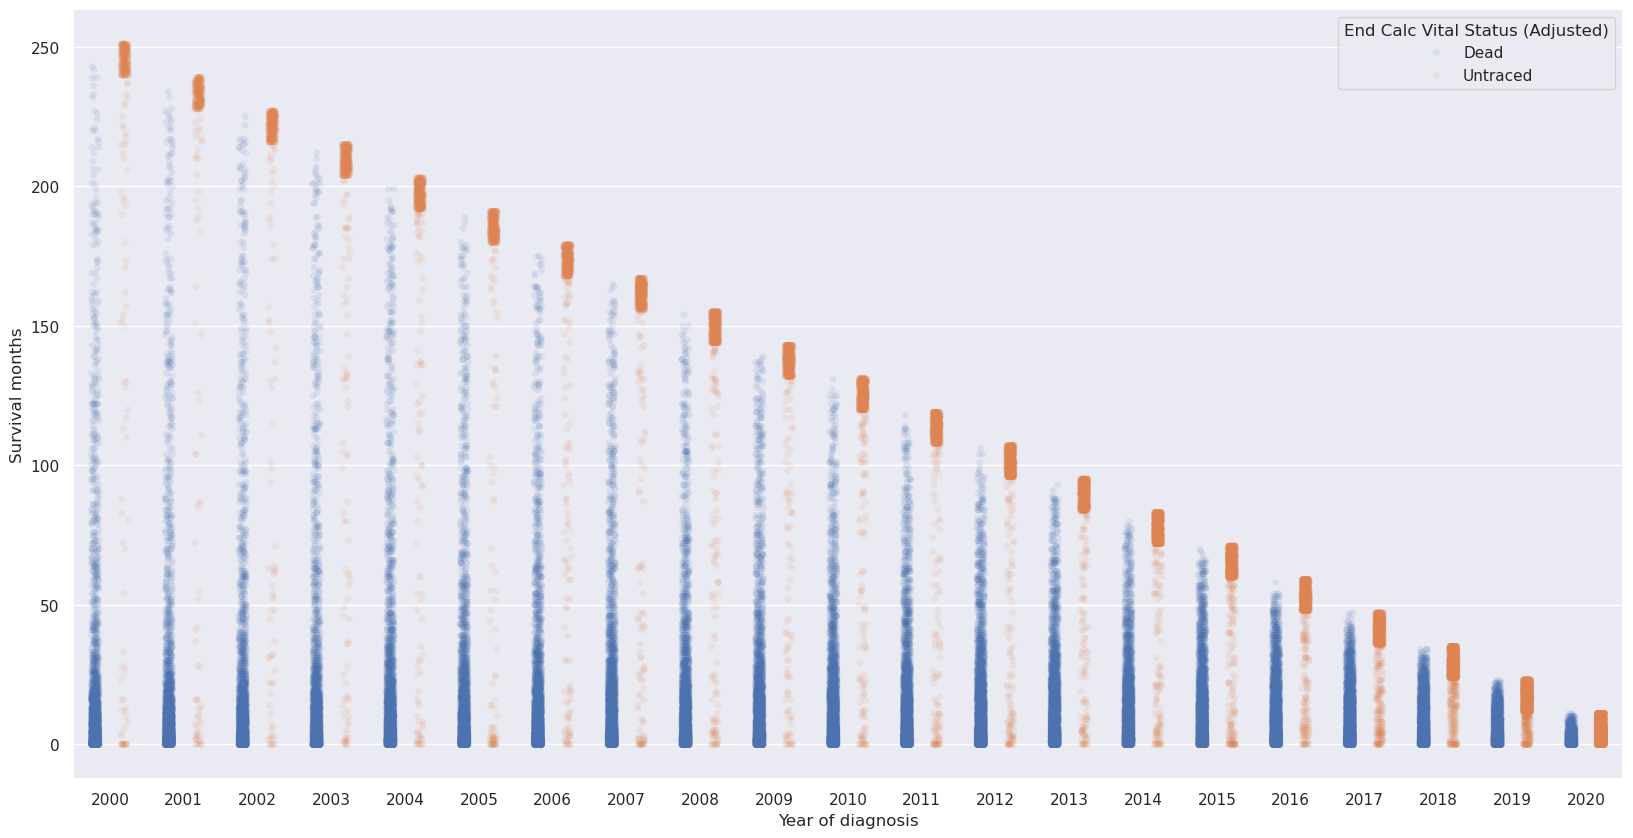

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
sns.stripplot(
    ax=ax,
    data=data,
    x='Year of diagnosis',
    y='Survival months',
    hue='End Calc Vital Status (Adjusted)',
    dodge=True,
    alpha=0.1
)

In [21]:
data['Survival months flag'].value_counts()

Survival months flag
Complete dates are available and there are more than 0 days of survival    74332
Name: count, dtype: int64

/tmp/ipykernel_29361/580358642.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


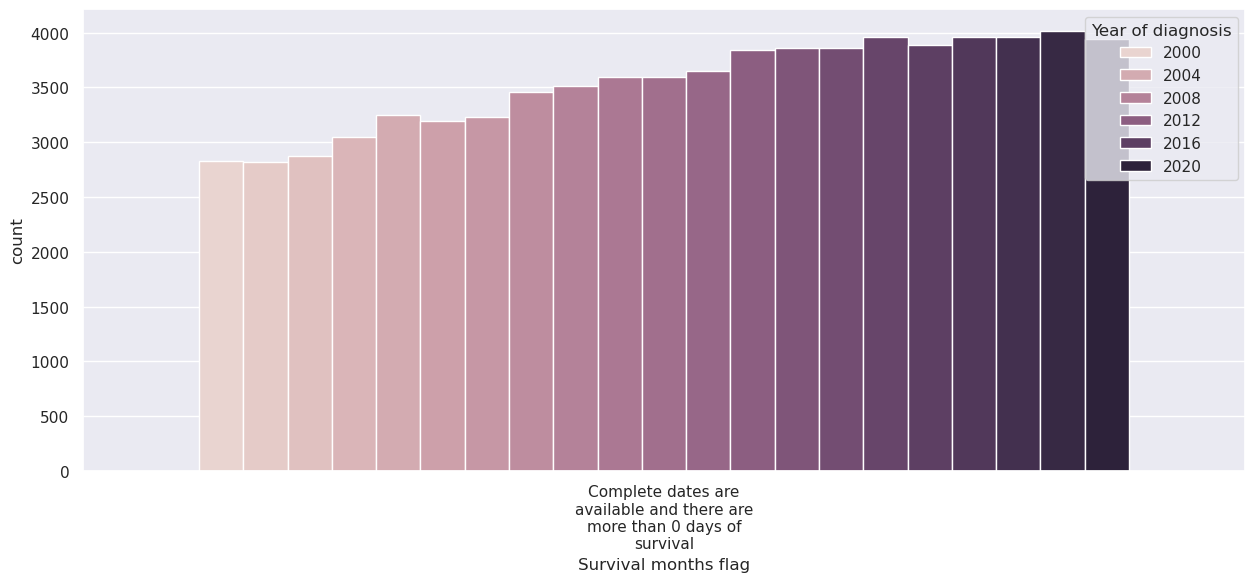

In [22]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(
    ax=ax,
    data=data,
    x='Survival months flag',
    hue='Year of diagnosis'
)
wrap_labels(ax, 25)

/tmp/ipykernel_29361/580358642.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_29361/580358642.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_29361/580358642.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_29361/580358642.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_29361/580358642.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_29361/580358642

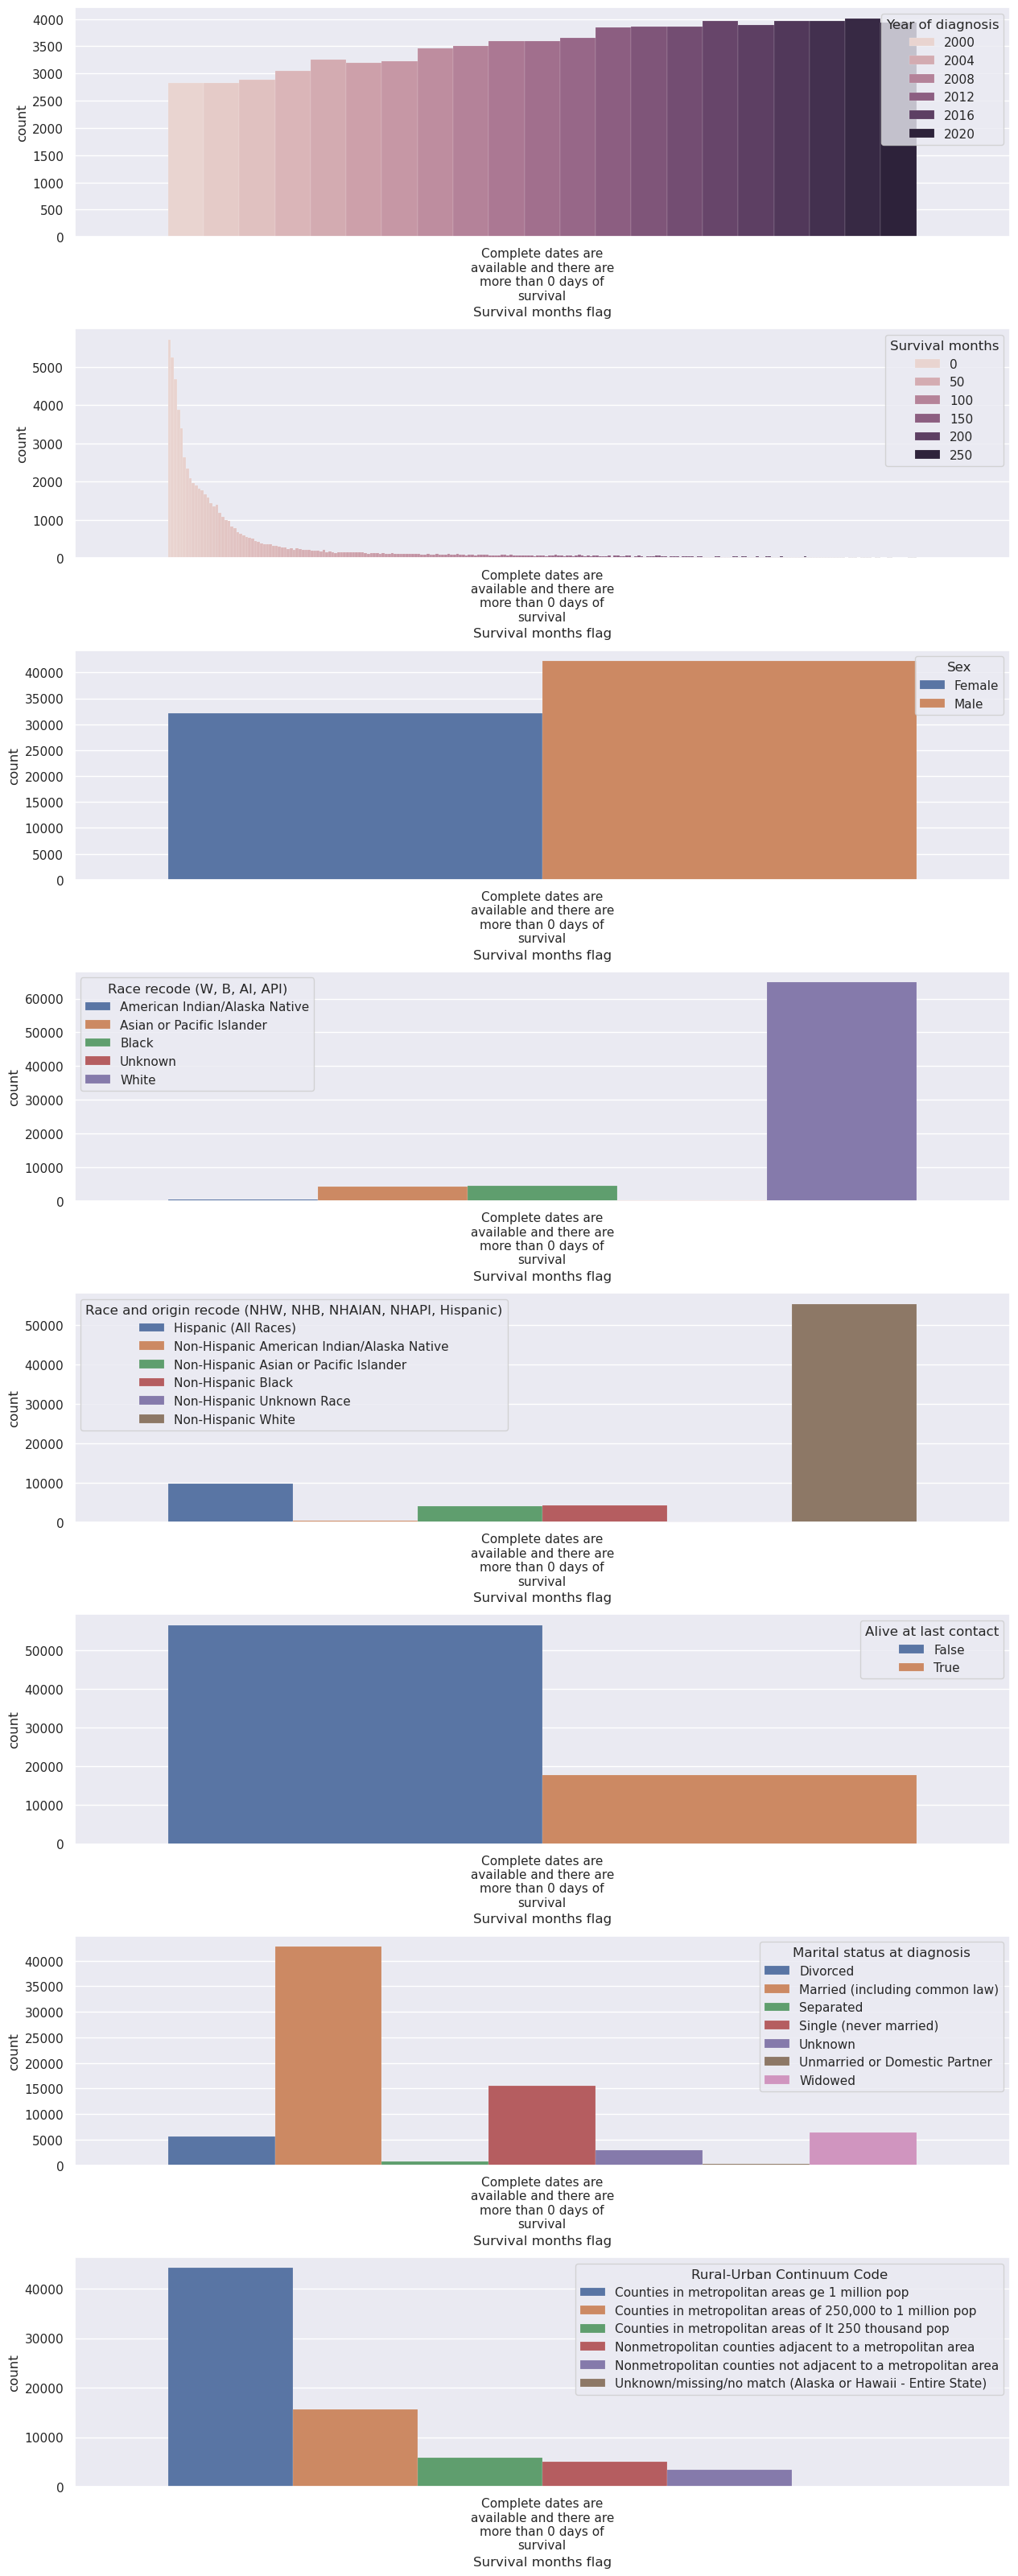

In [23]:
cols_to_plot = [
    'Year of diagnosis', 
    'Survival months', 
    'Sex', 
    'Race recode (W, B, AI, API)', 
    'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)',
    'Alive at last contact',
    'Marital status at diagnosis',
    'Rural-Urban Continuum Code',
]
fig, axarr = plt.subplots(len(cols_to_plot), 1, figsize=(15,5*len(cols_to_plot)))

for ax,col in zip(axarr, cols_to_plot):
    sns.countplot(
        ax=ax,
        data=data,
        x='Survival months flag',
        hue=col,
        linewidth=0.1
    )
    wrap_labels(ax, 25)
fig.subplots_adjust(hspace=0.4)

EOD 10 - size (1988-2003)
999    4582
50      891
40      831
30      615
60      610
       ... 
888       1
92        1
98        1
91        1
165       1
Name: count, Length: 109, dtype: Int64


<Axes: ylabel='Frequency'>

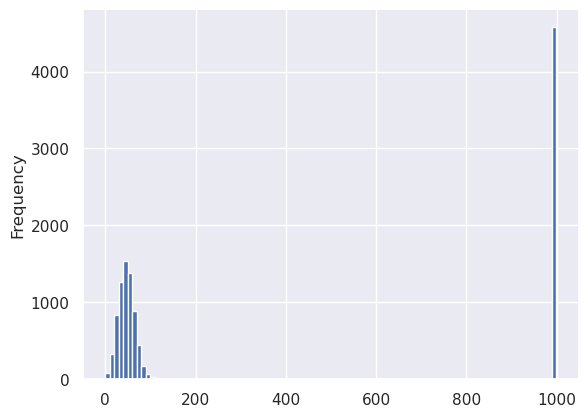

In [24]:
print(data['EOD 10 - size (1988-2003)'].value_counts())
data['EOD 10 - size (1988-2003)'].astype('Int64').plot.hist(bins=100)

CS tumor size (2004-2015)
999    9583
50     1864
40     1761
30     1417
60     1385
       ... 
410       1
450       1
167       1
660       1
810       1
Name: count, Length: 175, dtype: Int64


<Axes: ylabel='Frequency'>

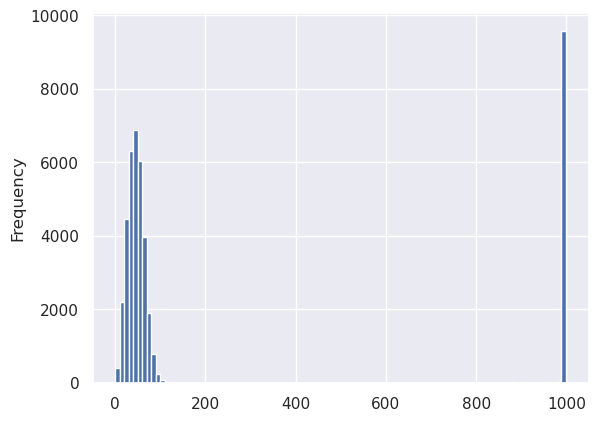

In [25]:
print(data['CS tumor size (2004-2015)'].value_counts())
data['CS tumor size (2004-2015)'].astype('Int64').plot.hist(bins=100)

Tumor Size Summary (2016+)
999    3547
50      611
40      559
30      488
60      457
       ... 
271       1
920       1
104       1
377       1
943       1
Name: count, Length: 134, dtype: Int64


<Axes: ylabel='Frequency'>

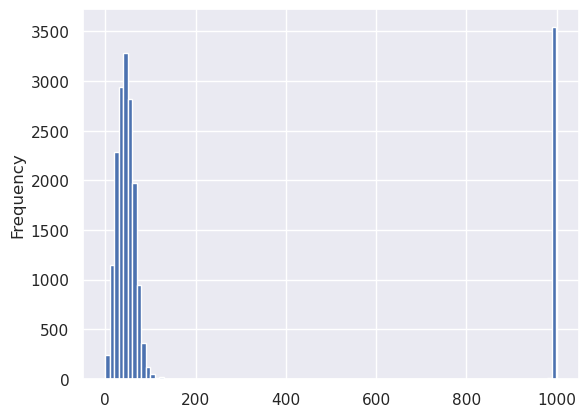

In [26]:
print(data["Tumor Size Summary (2016+)"].value_counts())
data["Tumor Size Summary (2016+)"].astype("Int64").plot.hist(bins=100)

In [27]:
# Rebuild dataframe with columns "Survival months" and "Year of diagnosis"
right_justified_data = pd.DataFrame(
    {
        "Time since start of study (months)": data["Survival months"]
        + 12 * (data["Year of diagnosis"] - 2000),
        "Year of diagnosis": data["Year of diagnosis"],
        "Vital status recode (study cutoff used)": data[
            "Vital status recode (study cutoff used)"
        ],
    }
)

In [28]:
right_justified_data

Time since start of study (months)  Year of diagnosis  \
0                                      22               2000   
2                                      10               2000   
3                                     244               2000   
4                                      82               2004   
5                                     242               2001   
...                                   ...                ...   
80955                                  72               2006   
80956                                   0               2000   
80957                                   8               2000   
80958                                  90               2007   
80959                                  72               2006   

      Vital status recode (study cutoff used)  
0                                        Dead  
2                                        Dead  
3                                       Alive  
4                                        Dead  
5                                       Alive  
...                                       ...  
80955                                    Dead  
80956                                    Dead  
80957                                    Dead  
80958                                    Dead  
80959                                    Dead  

[74332 rows x 3 columns]

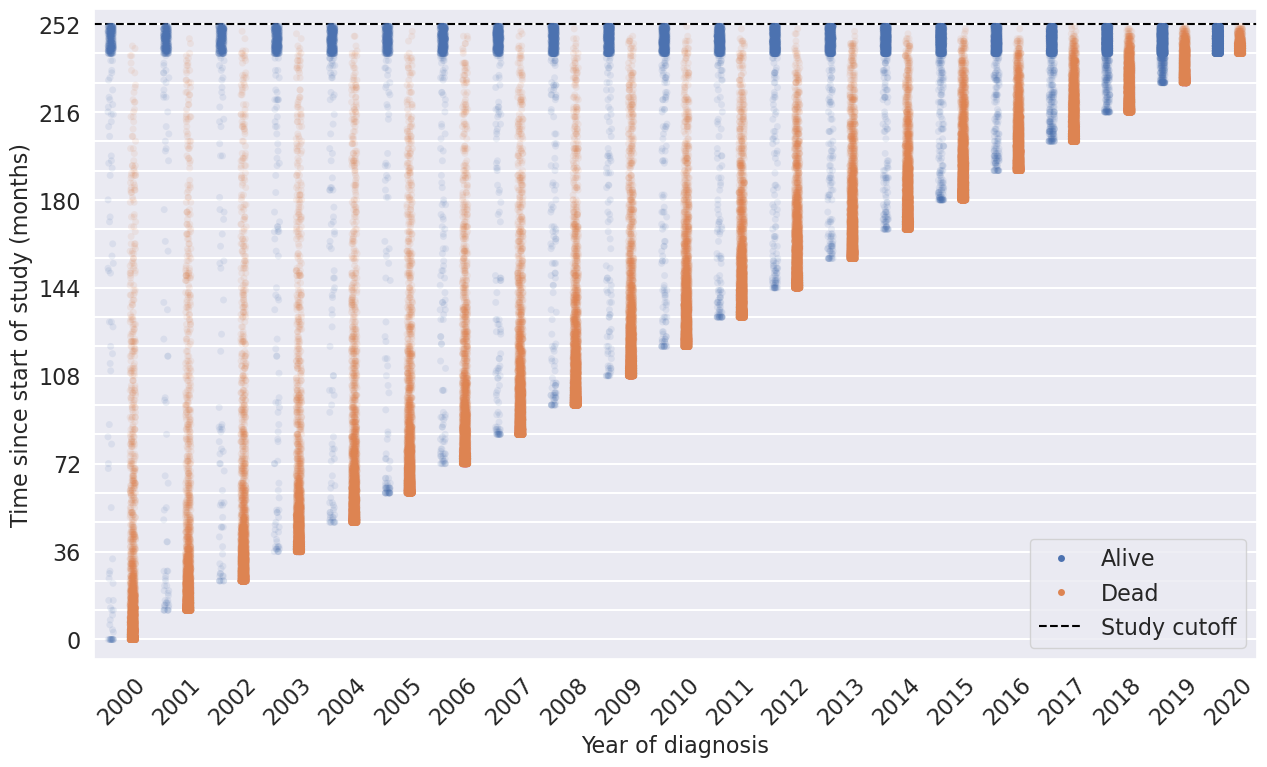

In [55]:
fig, ax = plt.subplots(figsize=(15, 15 * 9 / 16))
plot = sns.stripplot(
    ax=ax,
    data=right_justified_data,
    x="Year of diagnosis",
    y="Time since start of study (months)",
    hue="Vital status recode (study cutoff used)",
    dodge=True,
    alpha=0.1,
)

ax = plot.get_figure().gca()
ax.axhline(252, color="black", linestyle="--", label="Study cutoff")
legend = ax.legend(loc="lower right", fontsize=16)
for handle in legend.legend_handles:
    handle.set_alpha(1)

ax.grid(False)
locs = np.arange(0, 22) * 12
for loc in locs:
    ax.axhline(loc, color="white", zorder=-10)

ax.set_yticks(locs[::3])
ax.set_ylim(-8, 258)
plt.xticks(rotation=45)

for item in (
    [ax.xaxis.label, ax.yaxis.label]
    + ax.get_xticklabels()
    + ax.get_yticklabels()
):
    item.set_fontsize(16)

# plt.tight_layout()
# plt.savefig("survival_data.pdf")